In [0]:
from google.colab import drive

In [0]:
drive.mount("/content/drive")

KeyboardInterrupt: ignored

In [0]:
import pandas as pd


In [0]:
path = "drive/My Drive/HackerEarth/Gifts_Price_Prediction/"

In [0]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv") 


In [0]:
train["price"].value_counts()

69.59     8
46.25     8
51.00     8
50.49     8
59.01     8
         ..
838.98    1
85.02     1
21.78     1
269.54    1
135.40    1
Name: price, Length: 12959, dtype: int64

In [0]:
train.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


In [0]:
train["volumes"].nunique()

25

In [0]:
train["volumes"].isnull().sum()

12956

In [0]:
train.corr()

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,price
gift_type,1.000000,0.075328,-0.123263,0.369368,-0.063898,0.534393,0.055803,-0.073652,0.062589,-0.027933,0.083846,0.137145
gift_category,0.075328,1.000000,-0.138297,0.003494,-0.020970,-0.069802,0.053803,-0.339733,0.085429,0.011843,0.121377,0.286888
gift_cluster,-0.123263,-0.138297,1.000000,-0.106383,0.109072,0.067285,0.068613,0.146533,0.025014,0.063864,-0.010205,-0.282881
lsg_1,0.369368,0.003494,-0.106383,1.000000,-0.162152,0.524086,-0.126679,-0.125548,-0.033314,-0.193836,0.153268,0.147712
lsg_2,-0.063898,-0.020970,0.109072,-0.162152,1.000000,-0.037239,0.022979,0.040390,-0.039292,0.035532,0.101562,-0.185142
lsg_3,0.534393,-0.069802,0.067285,0.524086,-0.037239,1.000000,0.080235,-0.002776,0.067858,-0.120458,0.227968,0.006178
lsg_4,0.055803,0.053803,0.068613,-0.126679,0.022979,0.080235,1.000000,0.272718,0.371960,0.201302,0.066885,-0.222104
lsg_5,-0.073652,-0.339733,0.146533,-0.125548,0.040390,-0.002776,0.272718,1.000000,0.163077,0.094139,-0.014246,-0.525773
lsg_6,0.062589,0.085429,0.025014,-0.033314,-0.039292,0.067858,0.371960,0.163077,1.000000,0.122089,0.180311,-0.019769
is_discounted,-0.027933,0.011843,0.063864,-0.193836,0.035532,-0.120458,0.201302,0.094139,0.122089,1.000000,-0.021741,-0.157463


In [0]:
train.shape

(20279, 17)

In [0]:
from scipy.stats import norm
import seaborn as sns

In [0]:
train.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


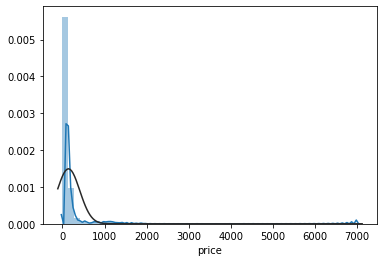

In [0]:
sns.distplot(train['price'] , fit=norm)
(mu, sigma) = norm.fit(train['price'])

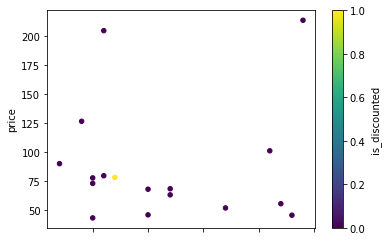

In [0]:
train.sample(50).plot.scatter(x='volumes',y='price',c='is_discounted',colormap='viridis')


In [0]:
train.shape

(20279, 17)

In [0]:
train["lsg_6"].nunique()

1583

In [0]:
import  matplotlib.pyplot as plt

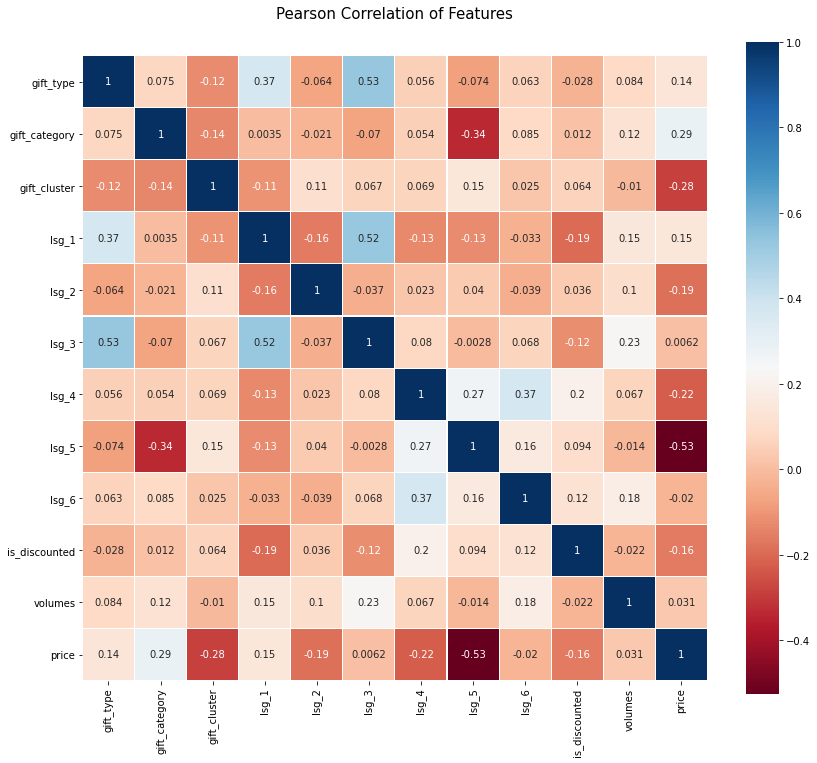

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# **Preprocessing**

In [0]:
train['instock_date'] = pd.to_datetime(train['instock_date'],format = '%Y-%m-%d %H:%M:%S')

In [0]:
train['stock_update_date'] = pd.to_datetime(train['stock_update_date'],format = '%Y-%m-%d %H:%M:%S')

In [0]:
train['uk_date1'] = pd.to_datetime(train['uk_date1'],format = '%Y-%m-%d %H:%M:%S')

In [0]:
train['uk_date2'] = pd.to_datetime(train['uk_date2'],format = '%Y-%m-%d %H:%M:%S')

In [0]:
test['instock_date'] = pd.to_datetime(test['instock_date'],format = '%Y-%m-%d %H:%M:%S')
test['stock_update_date'] = pd.to_datetime(test['stock_update_date'],format = '%Y-%m-%d %H:%M:%S')
test['uk_date1'] = pd.to_datetime(test['uk_date1'],format = '%Y-%m-%d %H:%M:%S')
test['uk_date2'] = pd.to_datetime(test['uk_date2'],format = '%Y-%m-%d %H:%M:%S')

In [0]:
train.shape

(20279, 17)

In [0]:
test.shape

(13519, 16)

In [0]:
train.dtypes

gift_id                      object
gift_type                     int64
gift_category                 int64
gift_cluster                  int64
instock_date         datetime64[ns]
stock_update_date    datetime64[ns]
lsg_1                         int64
lsg_2                         int64
lsg_3                         int64
lsg_4                         int64
lsg_5                         int64
lsg_6                         int64
uk_date1             datetime64[ns]
uk_date2             datetime64[ns]
is_discounted                 int64
volumes                     float64
price                       float64
dtype: object

In [0]:
train.isnull().sum()

gift_id                  0
gift_type                0
gift_category            0
gift_cluster             0
instock_date             0
stock_update_date        0
lsg_1                    0
lsg_2                    0
lsg_3                    0
lsg_4                    0
lsg_5                    0
lsg_6                    0
uk_date1                 0
uk_date2                 0
is_discounted            0
volumes              12956
price                    0
dtype: int64

In [0]:
test.isnull().sum()

gift_id                 0
gift_type               0
gift_category           0
gift_cluster            0
instock_date            0
stock_update_date       0
lsg_1                   0
lsg_2                   0
lsg_3                   0
lsg_4                   0
lsg_5                   0
lsg_6                   0
uk_date1                0
uk_date2                0
is_discounted           0
volumes              2352
dtype: int64

In [0]:
train["volumes"].mean()

15.515362556329373

In [0]:
train["volumes"].fillna(-999,inplace=True)
test["volumes"].fillna(-999,inplace=True)

In [0]:
train.groupby("gift_cluster")['lsg_5'].nunique()

gift_cluster
0       3
1       1
8       1
9       1
10      1
       ..
7563    1
7564    1
7565    1
7566    1
7567    1
Name: lsg_5, Length: 5414, dtype: int64

In [0]:
train[train["gift_category"] == 534]

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price,instock_date_year,instock_date_month,instock_date_week,instock_date_day,instock_date_hour,instock_date_minute,instock_date_dayofweek,stock_update_date_year,stock_update_date_month,stock_update_date_week,stock_update_date_day,stock_update_date_hour,stock_update_date_minute,stock_update_date_dayofweek,uk_date1_year,uk_date1_month,uk_date1_week,uk_date1_day,uk_date1_hour,uk_date1_minute,uk_date1_dayofweek,uk_date2_year,uk_date2_month,uk_date2_week,uk_date2_day,uk_date2_hour,uk_date2_minute,uk_date2_dayofweek,max_lsg1_per_category,min_lsg1_per_category,mean_lsg1_per_category
0,GF_11156,61,534,3942,2014-02-21 05:07:06,2016-11-09 15:49:51,3377,5221,504,1912,10,554,2014-02-24 08:07:06,2014-02-24 07:07:06.000,0,-999.0,175.54,2014,2,8,21,5,7,4,2016,11,45,9,15,49,2,2014,2,9,24,8,7,0,2014,2,9,24,7,7,0,9976,10,3638.004931
1,GF_11157,61,534,3942,2014-02-21 06:07:06,2016-11-11 13:49:51,3377,5221,504,1912,10,554,2014-02-22 07:07:06,2014-02-24 06:07:06.000,1,-999.0,95.80,2014,2,8,21,6,7,4,2016,11,45,11,13,49,4,2014,2,8,22,7,7,5,2014,2,9,24,6,7,0,9976,10,3816.751429
3,GF_11155,61,534,3942,2014-02-22 05:07:06,2016-11-10 16:49:51,3377,5221,504,1912,10,554,2016-11-07 13:49:51,2016-11-06 04:00:00.000,0,-999.0,172.90,2014,2,8,22,5,7,5,2016,11,45,10,16,49,3,2016,11,45,7,13,49,0,2016,11,44,6,4,0,6,9976,10,3638.004931
4,GF_11158,61,534,3942,2014-02-22 07:07:06,2016-11-10 13:49:51,3377,5221,504,1912,9,554,2016-11-07 15:49:51,2016-11-06 01:00:00.000,1,-999.0,77.72,2014,2,8,22,7,7,5,2016,11,45,10,13,49,3,2016,11,45,7,15,49,0,2016,11,44,6,1,0,6,9976,10,3816.751429
8,GF_11159,61,534,3942,2014-02-25 07:07:06,2016-11-10 14:49:51,3377,5221,504,1912,10,554,2016-11-07 16:49:51,2015-04-08 12:48:27.025,0,-999.0,72.72,2014,2,9,25,7,7,1,2016,11,45,10,14,49,3,2016,11,45,7,16,49,0,2015,4,15,8,12,48,2,9976,10,3638.004931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20257,GF_9690,262,534,1694,2016-11-12 13:13:45,2016-11-16 14:13:45,4155,721,1752,1912,9,1899,2016-11-12 13:13:45,2016-11-14 05:00:00.000,1,-999.0,37.14,2016,11,45,12,13,13,5,2016,11,46,16,14,13,2,2016,11,45,12,13,13,5,2016,11,46,14,5,0,0,9976,10,3816.751429
20260,GF_1262,251,534,4504,2016-11-12 13:14:48,2016-11-16 12:14:48,4118,6173,1683,1912,10,1899,2016-11-15 11:14:48,2016-10-29 01:00:00.000,1,-999.0,190.93,2016,11,45,12,13,14,5,2016,11,46,16,12,14,2,2016,11,46,15,11,14,1,2016,10,43,29,1,0,5,9976,10,3816.751429
20262,GF_8155,218,534,1259,2016-11-12 13:14:52,2016-11-16 13:14:52,1951,6883,1717,1912,9,441,2016-11-14 10:14:52,2016-11-04 05:00:00.000,1,-999.0,43.03,2016,11,45,12,13,14,5,2016,11,46,16,13,14,2,2016,11,46,14,10,14,0,2016,11,44,4,5,0,4,9976,10,3816.751429
20268,GF_6996,316,534,2746,2016-11-12 13:17:54,2016-11-17 11:51:07,4356,867,1985,1912,10,933,2016-11-13 11:51:07,2016-11-14 04:00:00.000,1,-999.0,54.08,2016,11,45,12,13,17,5,2016,11,46,17,11,51,3,2016,11,45,13,11,51,6,2016,11,46,14,4,0,0,9976,10,3816.751429


In [0]:
test[test["gift_cluster"]==0]

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,instock_date_year,instock_date_month,instock_date_week,instock_date_day,instock_date_hour,instock_date_minute,instock_date_dayofweek,stock_update_date_year,stock_update_date_month,stock_update_date_week,stock_update_date_day,stock_update_date_hour,stock_update_date_minute,stock_update_date_dayofweek,uk_date1_year,uk_date1_month,uk_date1_week,uk_date1_day,uk_date1_hour,uk_date1_minute,uk_date1_dayofweek,uk_date2_year,uk_date2_month,uk_date2_week,uk_date2_day,uk_date2_hour,uk_date2_minute,uk_date2_dayofweek,max_lsg1_per_category,min_lsg1_per_category,mean_lsg1_per_category
1279,GF_1427,191,822,0,2016-11-20 20:17:07,2016-11-24 21:17:07,3927,1794,1393,1912,9,921,2016-11-19 21:17:07,2016-03-19 05:00:00.000,0,-999.0,2016,11,46,20,20,17,6,2016,11,47,24,21,17,3,2016,11,46,19,21,17,5,2016,3,11,19,5,0,5,8738.0,3403.0,7463.294118
1280,GF_1431,191,822,0,2016-11-20 22:17:07,2016-11-23 22:17:07,3927,1794,1393,1912,9,921,2016-11-18 22:17:07,2016-01-04 04:00:00.000,1,-999.0,2016,11,46,20,22,17,6,2016,11,47,23,22,17,2,2016,11,46,18,22,17,4,2016,1,1,4,4,0,0,8738.0,3403.0,6661.451613
1288,GF_1429,191,822,0,2016-11-21 21:17:07,2016-11-22 22:17:07,3927,1794,1393,1912,9,921,2016-11-18 19:17:07,2016-02-14 01:00:00.000,1,-999.0,2016,11,47,21,21,17,0,2016,11,47,22,22,17,1,2016,11,46,18,19,17,4,2016,2,6,14,1,0,6,8738.0,3403.0,6661.451613
1289,GF_1430,191,822,0,2016-11-21 21:17:07,2016-11-24 19:17:07,3927,1794,1393,1912,9,921,2016-11-18 23:17:07,2016-03-21 02:00:00.000,1,-999.0,2016,11,47,21,21,17,0,2016,11,47,24,19,17,3,2016,11,46,18,23,17,4,2016,3,12,21,2,0,0,8738.0,3403.0,6661.451613
1290,GF_1428,191,822,0,2016-11-21 22:17:07,2016-11-24 23:17:07,3927,1794,1393,1912,9,921,2016-11-22 23:17:07,2015-12-12 04:00:00.000,0,-999.0,2016,11,47,21,22,17,0,2016,11,47,24,23,17,3,2016,11,47,22,23,17,1,2015,12,50,12,4,0,5,8738.0,3403.0,7463.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13514,GF_29169,31,65,0,2017-04-07 20:51:34,2017-04-10 19:51:34,3252,3211,7565,1845,9,1899,2017-04-04 21:51:34,2017-03-30 07:00:59.623,0,27.0,2017,4,14,7,20,51,4,2017,4,15,10,19,51,0,2017,4,14,4,21,51,1,2017,3,13,30,7,0,3,5713.0,3726.0,4388.333333
13515,GF_29165,31,65,0,2017-04-07 22:51:34,2017-04-08 22:51:34,3252,3211,7565,1786,9,1899,2017-04-04 20:51:34,2017-04-02 09:00:59.623,0,23.0,2017,4,14,7,22,51,4,2017,4,14,8,22,51,5,2017,4,14,4,20,51,1,2017,4,13,2,9,0,6,5713.0,3726.0,4388.333333
13516,GF_29168,31,65,0,2017-04-07 22:51:34,2017-04-08 22:51:34,3252,3211,7565,1830,9,1899,2017-04-08 19:51:34,2017-03-31 06:00:59.623,0,23.0,2017,4,14,7,22,51,4,2017,4,14,8,22,51,5,2017,4,14,8,19,51,5,2017,3,13,31,6,0,4,5713.0,3726.0,4388.333333
13517,GF_33797,280,184,0,2017-04-15 18:55:17,2017-04-19 00:44:29,4198,3332,1805,1912,9,1899,2017-04-19 01:44:29,2017-04-15 18:03:15.352,0,-999.0,2017,4,15,15,18,55,5,2017,4,16,19,0,44,2,2017,4,16,19,1,44,2,2017,4,15,15,18,3,5,NaN,NaN,NaN


In [0]:
train["gift_cluster"].nunique()

5414

# **Features engineering**

In [0]:
def features_engineering_date(df,col):
  df[col+'_year'] = df[col].dt.year
  df[col+'_month'] = df[col].dt.month
  df[col+'_week'] = df[col].dt.week
  df[col+'_day'] = df[col].dt.day
  df[col+'_hour'] = df[col].dt.hour
  df[col+'_minute'] = df[col].dt.minute
  df[col+'_dayofweek'] = df[col].dt.dayofweek
  return df

  

In [0]:
train = features_engineering_date(train,'instock_date')
train = features_engineering_date(train,'stock_update_date')
train = features_engineering_date(train,'uk_date1')
train = features_engineering_date(train,'uk_date2')


test = features_engineering_date(test,'instock_date')
test = features_engineering_date(test,'stock_update_date')
test = features_engineering_date(test,'uk_date1')
test = features_engineering_date(test,'uk_date2')

In [0]:
import numpy as np

In [0]:
def features_engineering_lsg1_category(df):
  gb = train.groupby(["gift_category","is_discounted"],as_index=False).agg({'lsg_1': ['max', 'min','mean']})
  gb.columns = ["gift_category","is_discounted","max_lsg1_per_category","min_lsg1_per_category","mean_lsg1_per_category"]
  df = pd.merge(df,gb,on=['gift_category','is_discounted'],how='left')
  return df

In [0]:
"""
train = features_engineering_lsg1_category(train)
test = features_engineering_lsg1_category(test)
"""

In [0]:
train.head(20)

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price,instock_date_year,instock_date_month,instock_date_week,instock_date_day,instock_date_hour,instock_date_minute,instock_date_dayofweek,stock_update_date_year,stock_update_date_month,stock_update_date_week,stock_update_date_day,stock_update_date_hour,stock_update_date_minute,stock_update_date_dayofweek,uk_date1_year,uk_date1_month,uk_date1_week,uk_date1_day,uk_date1_hour,uk_date1_minute,uk_date1_dayofweek,uk_date2_year,uk_date2_month,uk_date2_week,uk_date2_day,uk_date2_hour,uk_date2_minute,uk_date2_dayofweek,max_lsg1_per_category,min_lsg1_per_category,mean_lsg1_per_category
0,GF_11156,61,534,3942,2014-02-21 05:07:06,2016-11-09 15:49:51,3377,5221,504,1912,10,554,2014-02-24 08:07:06,2014-02-24 07:07:06.000,0,-999.0,175.54,2014,2,8,21,5,7,4,2016,11,45,9,15,49,2,2014,2,9,24,8,7,0,2014,2,9,24,7,7,0,9976,10,3638.004931
1,GF_11157,61,534,3942,2014-02-21 06:07:06,2016-11-11 13:49:51,3377,5221,504,1912,10,554,2014-02-22 07:07:06,2014-02-24 06:07:06.000,1,-999.0,95.80,2014,2,8,21,6,7,4,2016,11,45,11,13,49,4,2014,2,8,22,7,7,5,2014,2,9,24,6,7,0,9976,10,3816.751429
2,GF_15689,584,262,0,2014-02-21 09:30:21,2016-03-24 14:46:18,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45,2016-03-18 02:00:00.000,1,-999.0,107.35,2014,2,8,21,9,30,4,2016,3,12,24,14,46,3,2016,1,4,26,0,4,1,2016,3,11,18,2,0,4,5290,5290,5290.000000
3,GF_11155,61,534,3942,2014-02-22 05:07:06,2016-11-10 16:49:51,3377,5221,504,1912,10,554,2016-11-07 13:49:51,2016-11-06 04:00:00.000,0,-999.0,172.90,2014,2,8,22,5,7,5,2016,11,45,10,16,49,3,2016,11,45,7,13,49,0,2016,11,44,6,4,0,6,9976,10,3638.004931
4,GF_11158,61,534,3942,2014-02-22 07:07:06,2016-11-10 13:49:51,3377,5221,504,1912,9,554,2016-11-07 15:49:51,2016-11-06 01:00:00.000,1,-999.0,77.72,2014,2,8,22,7,7,5,2016,11,45,10,13,49,3,2016,11,45,7,15,49,0,2016,11,44,6,1,0,6,9976,10,3816.751429
5,GF_15686,584,262,0,2014-02-23 07:30:21,2016-03-23 15:46:18,5290,1579,3203,1912,9,1578,2014-02-25 07:30:21,2014-02-24 08:30:21.000,1,-999.0,142.84,2014,2,8,23,7,30,6,2016,3,12,23,15,46,2,2014,2,9,25,7,30,1,2014,2,9,24,8,30,0,5290,5290,5290.000000
6,GF_15690,584,262,0,2014-02-23 10:30:21,2016-03-23 18:46:18,5290,1579,3203,1912,9,1578,2016-01-25 02:04:45,2016-03-16 02:00:00.000,1,-999.0,78.71,2014,2,8,23,10,30,6,2016,3,12,23,18,46,2,2016,1,4,25,2,4,0,2016,3,11,16,2,0,2,5290,5290,5290.000000
7,GF_15685,584,262,0,2014-02-24 10:30:21,2016-03-24 17:46:18,5290,1579,3203,1912,9,1578,2016-01-22 03:04:45,2016-03-17 03:00:00.000,0,-999.0,166.81,2014,2,9,24,10,30,0,2016,3,12,24,17,46,3,2016,1,3,22,3,4,4,2016,3,11,17,3,0,3,5290,5290,5290.000000
8,GF_11159,61,534,3942,2014-02-25 07:07:06,2016-11-10 14:49:51,3377,5221,504,1912,10,554,2016-11-07 16:49:51,2015-04-08 12:48:27.025,0,-999.0,72.72,2014,2,9,25,7,7,1,2016,11,45,10,14,49,3,2016,11,45,7,16,49,0,2015,4,15,8,12,48,2,9976,10,3638.004931
9,GF_15688,584,262,0,2014-02-25 08:30:21,2016-03-24 16:46:18,5290,1579,3203,1912,9,1578,2016-01-23 03:04:45,2016-03-11 04:00:00.000,1,-999.0,107.12,2014,2,9,25,8,30,1,2016,3,12,24,16,46,3,2016,1,3,23,3,4,5,2016,3,10,11,4,0,4,5290,5290,5290.000000


In [0]:
test.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,instock_date_year,instock_date_month,instock_date_week,instock_date_day,instock_date_hour,instock_date_minute,instock_date_dayofweek,stock_update_date_year,stock_update_date_month,stock_update_date_week,stock_update_date_day,stock_update_date_hour,stock_update_date_minute,stock_update_date_dayofweek,uk_date1_year,uk_date1_month,uk_date1_week,uk_date1_day,uk_date1_hour,uk_date1_minute,uk_date1_dayofweek,uk_date2_year,uk_date2_month,uk_date2_week,uk_date2_day,uk_date2_hour,uk_date2_minute,uk_date2_dayofweek,max_price_per_category,min_price_per_category,mean_per_category
0,GF_2372,842,663,24,2016-11-12 13:49:12,2016-11-16 10:49:12,203,1334,4358,1912,10,1899,2016-11-16 12:49:12,2016-11-13 04:00:00,0,-999.0,2016,11,45,12,13,49,5,2016,11,46,16,10,49,2,2016,11,46,16,12,49,2,2016,11,45,13,4,0,6,168.75,23.53,112.359000
1,GF_13040,407,534,754,2016-11-12 13:49:22,2016-11-17 14:49:22,4785,5940,2582,1912,10,1488,2016-11-12 14:49:22,2016-11-03 01:00:00,0,-999.0,2016,11,45,12,13,49,5,2016,11,46,17,14,49,3,2016,11,45,12,14,49,5,2016,11,44,3,1,0,3,1341.61,7.03,121.989369
2,GF_5754,631,433,6012,2016-11-12 13:49:23,2016-11-16 13:49:23,1812,5027,3427,1912,10,1913,2016-11-15 11:49:23,2016-11-01 05:00:00,1,-999.0,2016,11,45,12,13,49,5,2016,11,46,16,13,49,2,2016,11,46,15,11,49,1,2016,11,44,1,5,0,1,453.56,1.25,44.095642
3,GF_1417,992,433,6358,2016-11-12 13:49:24,2016-11-16 11:49:24,2002,6883,5537,1912,10,1734,2016-11-14 12:49:24,2016-11-04 04:00:00,0,-999.0,2016,11,45,12,13,49,5,2016,11,46,16,11,49,2,2016,11,46,14,12,49,0,2016,11,44,4,4,0,4,653.23,5.40,99.879630
4,GF_23204,43,534,6123,2016-11-12 13:49:40,2016-11-18 11:49:40,1512,6883,610,1912,9,150,2016-11-14 10:49:40,2016-11-02 01:00:00,1,-999.0,2016,11,45,12,13,49,5,2016,11,46,18,11,49,4,2016,11,46,14,10,49,0,2016,11,44,2,1,0,2,545.52,1.26,53.578581


In [0]:
print(test.shape)
print(train.shape)

(13519, 47)
(20279, 48)


# **Visualization**

In [0]:
from matplotlib.pyplot import plot as plt

In [0]:
train['price'].describe()

count    20279.000000
mean       143.404411
std        267.281159
min          0.010000
25%         45.645000
50%         75.600000
75%        126.845000
max       7010.270000
Name: price, dtype: float64

In [0]:
train['lsg_5'].value_counts()

9     10390
10     7605
1      1369
3       404
8       247
6       127
4       105
7        15
5        12
0         3
2         2
Name: lsg_5, dtype: int64

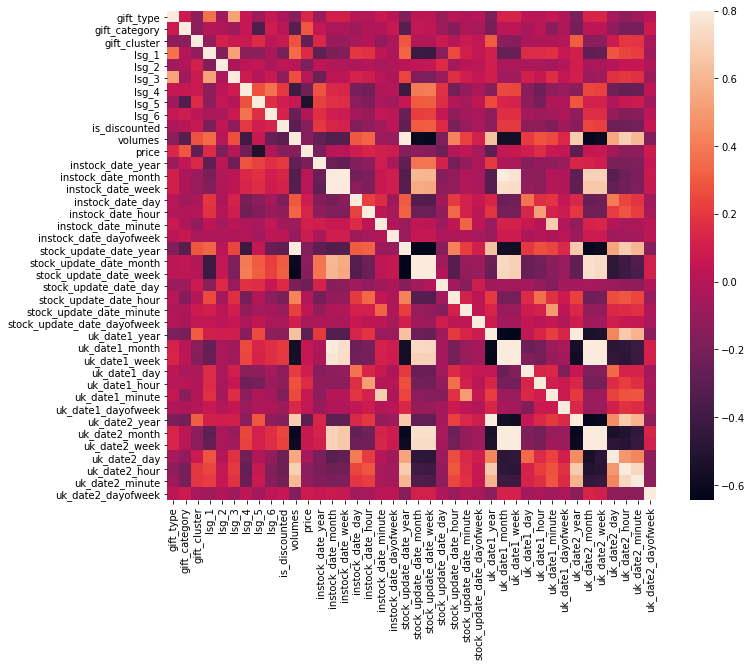

In [0]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True);

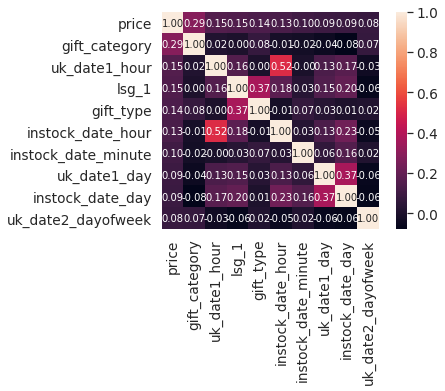

In [0]:
import numpy as np
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,price
1,gift_category
2,uk_date1_hour
3,lsg_1
4,gift_type
5,instock_date_hour
6,instock_date_minute
7,uk_date1_day
8,instock_date_day
9,uk_date2_dayofweek


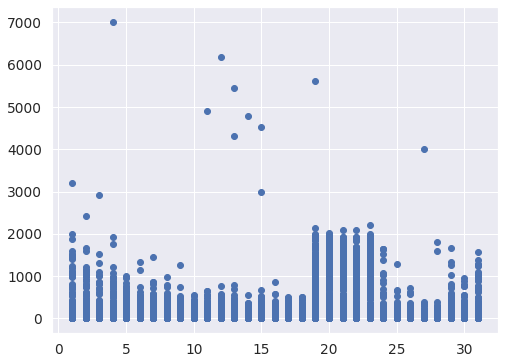

In [0]:
# Overall Quality vs Sale Price
var = 'uk_date1_day'
data = pd.concat([train['price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
#fig = sns.boxplot(x=var, y="price", data=data)

plt.scatter(x=var, y="price",data=data)


 mu = 143.40 and sigma = 267.27



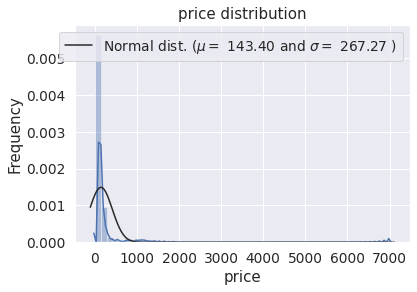

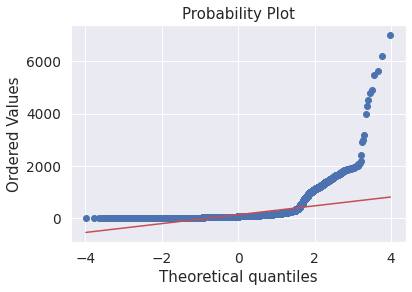

Skewness: 6.732912
Kurtosis: 84.119982


In [0]:
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
# Plot Histogram
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

print("Skewness: %f" % train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())


 mu = 4.38 and sigma = 0.97



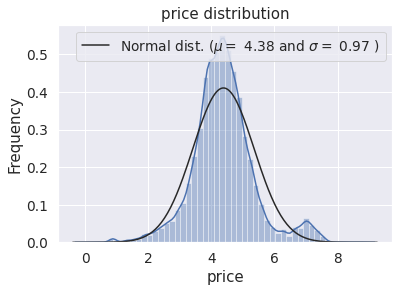

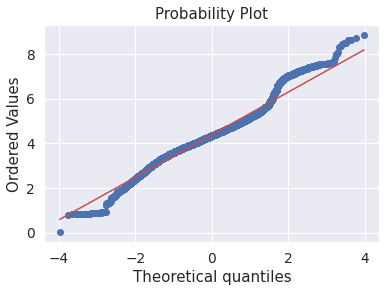

Skewness: 0.423720
Kurtosis: 1.799487


In [0]:

# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["price"] = np.log1p(train["price"])

#Check the new distribution 
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

y_train = train.price.values

print("Skewness: %f" % train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())


# **Train**

In [0]:
num_cols = list(train.select_dtypes(exclude=['object','datetime64[ns]']).columns)

In [0]:
train_data = train[num_cols]
train_data.drop("volumes",axis = 1)
Y = train["price"]

In [0]:
num_test_cols = [i for i in num_cols if (i != 'price')]

In [0]:
test_data = test[num_test_cols]
test_data.drop("volumes",axis = 1)

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,instock_date_year,instock_date_month,instock_date_week,instock_date_day,instock_date_hour,instock_date_minute,instock_date_dayofweek,stock_update_date_year,stock_update_date_month,stock_update_date_week,stock_update_date_day,stock_update_date_hour,stock_update_date_minute,stock_update_date_dayofweek,uk_date1_year,uk_date1_month,uk_date1_week,uk_date1_day,uk_date1_hour,uk_date1_minute,uk_date1_dayofweek,uk_date2_year,uk_date2_month,uk_date2_week,uk_date2_day,uk_date2_hour,uk_date2_minute,uk_date2_dayofweek
0,842,663,24,203,1334,4358,1912,10,1899,0,2016,11,45,12,13,49,5,2016,11,46,16,10,49,2,2016,11,46,16,12,49,2,2016,11,45,13,4,0,6
1,407,534,754,4785,5940,2582,1912,10,1488,0,2016,11,45,12,13,49,5,2016,11,46,17,14,49,3,2016,11,45,12,14,49,5,2016,11,44,3,1,0,3
2,631,433,6012,1812,5027,3427,1912,10,1913,1,2016,11,45,12,13,49,5,2016,11,46,16,13,49,2,2016,11,46,15,11,49,1,2016,11,44,1,5,0,1
3,992,433,6358,2002,6883,5537,1912,10,1734,0,2016,11,45,12,13,49,5,2016,11,46,16,11,49,2,2016,11,46,14,12,49,0,2016,11,44,4,4,0,4
4,43,534,6123,1512,6883,610,1912,9,150,1,2016,11,45,12,13,49,5,2016,11,46,18,11,49,4,2016,11,46,14,10,49,0,2016,11,44,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13514,31,65,0,3252,3211,7565,1845,9,1899,0,2017,4,14,7,20,51,4,2017,4,15,10,19,51,0,2017,4,14,4,21,51,1,2017,3,13,30,7,0,3
13515,31,65,0,3252,3211,7565,1786,9,1899,0,2017,4,14,7,22,51,4,2017,4,14,8,22,51,5,2017,4,14,4,20,51,1,2017,4,13,2,9,0,6
13516,31,65,0,3252,3211,7565,1830,9,1899,0,2017,4,14,7,22,51,4,2017,4,14,8,22,51,5,2017,4,14,8,19,51,5,2017,3,13,31,6,0,4
13517,280,184,0,4198,3332,1805,1912,9,1899,0,2017,4,15,15,18,55,5,2017,4,16,19,0,44,2,2017,4,16,19,1,44,2,2017,4,15,15,18,3,5


In [0]:
train_data.drop("price",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
train_data

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,instock_date_year,instock_date_month,instock_date_week,instock_date_day,instock_date_hour,instock_date_minute,instock_date_dayofweek,stock_update_date_year,stock_update_date_month,stock_update_date_week,stock_update_date_day,stock_update_date_hour,stock_update_date_minute,stock_update_date_dayofweek,uk_date1_year,uk_date1_month,uk_date1_week,uk_date1_day,uk_date1_hour,uk_date1_minute,uk_date1_dayofweek,uk_date2_year,uk_date2_month,uk_date2_week,uk_date2_day,uk_date2_hour,uk_date2_minute,uk_date2_dayofweek
0,61,534,3942,3377,5221,504,1912,10,554,0,-999.0,2014,2,8,21,5,7,4,2016,11,45,9,15,49,2,2014,2,9,24,8,7,0,2014,2,9,24,7,7,0
1,61,534,3942,3377,5221,504,1912,10,554,1,-999.0,2014,2,8,21,6,7,4,2016,11,45,11,13,49,4,2014,2,8,22,7,7,5,2014,2,9,24,6,7,0
2,584,262,0,5290,1579,3203,1912,9,1578,1,-999.0,2014,2,8,21,9,30,4,2016,3,12,24,14,46,3,2016,1,4,26,0,4,1,2016,3,11,18,2,0,4
3,61,534,3942,3377,5221,504,1912,10,554,0,-999.0,2014,2,8,22,5,7,5,2016,11,45,10,16,49,3,2016,11,45,7,13,49,0,2016,11,44,6,4,0,6
4,61,534,3942,3377,5221,504,1912,9,554,1,-999.0,2014,2,8,22,7,7,5,2016,11,45,10,13,49,3,2016,11,45,7,15,49,0,2016,11,44,6,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20274,105,704,6448,2055,6883,995,1912,10,1899,0,-999.0,2016,11,45,12,13,46,5,2016,11,46,17,10,46,3,2016,11,46,14,14,46,0,2016,11,45,11,3,0,4
20275,1220,526,817,8323,6753,6706,1912,10,1899,0,-999.0,2016,11,45,12,13,46,5,2016,11,46,18,13,46,4,2016,11,45,13,10,46,6,2016,10,43,28,2,0,4
20276,509,705,821,2826,4009,2912,1912,10,1451,0,-999.0,2016,11,45,12,13,46,5,2017,1,3,21,19,30,5,2017,1,3,21,18,30,5,2017,1,3,18,1,0,2
20277,682,213,5620,2089,6883,3607,1912,10,822,0,-999.0,2016,11,45,12,13,47,5,2016,11,46,18,11,47,4,2016,11,46,14,12,47,0,2016,11,45,13,2,0,6


In [0]:
train_data.isnull().sum()

gift_type                      0
gift_category                  0
gift_cluster                   0
lsg_1                          0
lsg_2                          0
lsg_3                          0
lsg_4                          0
lsg_5                          0
lsg_6                          0
is_discounted                  0
volumes                        0
instock_date_year              0
instock_date_month             0
instock_date_week              0
instock_date_day               0
instock_date_hour              0
instock_date_minute            0
instock_date_dayofweek         0
stock_update_date_year         0
stock_update_date_month        0
stock_update_date_week         0
stock_update_date_day          0
stock_update_date_hour         0
stock_update_date_minute       0
stock_update_date_dayofweek    0
uk_date1_year                  0
uk_date1_month                 0
uk_date1_week                  0
uk_date1_day                   0
uk_date1_hour                  0
uk_date1_m

In [0]:
Y.shape

(20279,)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,Y,test_size=0.1,random_state=2)

In [0]:
y_train.shape

(18251,)

In [0]:
test_data.shape

(13519, 39)

In [0]:

!pip install lightgbm

     |████████████████████████████████| 64.8MB 45kB/s 


In [0]:
pip install xgboost

# **Define a cross validation strategy**

In [0]:
#Validation function
n_folds = 5

def rmae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data.values)
    rmae= np.sqrt(-cross_val_score(model, train_data.values, Y, scoring="neg_mean_absolute_error", cv = kf))
    return(max(0,100-rmae.mean()))

# **Base models** Ensembling

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.1,
                                   max_depth=7,
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,objective ='reg:squarederror',
                             learning_rate=0.1, max_depth=7, 
                             n_estimators=3000,
                             random_state =7, nthread = -1)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=3000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
ada_reg = AdaBoostRegressor(random_state=0, n_estimators=600)

In [0]:
score = rmae_cv(ada_reg)
print("\AdaBoost score: {:.4f}\n".format(score))

\AdaBoost score: 99.1349



In [0]:
score = rmae_cv(lasso)
print("\nLasso score: {:.4f}\n".format(score))


Lasso score: 99.1890



In [0]:
score = rmae_cv(ENet)
print("ElasticNet score: {:.4f}\n".format(score))

ElasticNet score: 99.1889



In [0]:
score = rmae_cv(model_xgb)
print("Xgboost score:: {:.4f}\n".format(score))


[06:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:27:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [0]:
score = rmae_cv(model_lgb)
print("LGBM score: {:.4f}\n".format(score))

In [0]:
score = rmae_cv(GBoost)
print("Gradient Boosting score: {:.4f}\n".format(score))

Gradient Boosting score: 0.6909 (0.0434)



In [0]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        # out of fold predictions contains "numbers of models" of predictions : in our case 2 base modells so 2 ne features to be trained in meta model 
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [0]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet,model_xgb,ada_reg),
                                                 meta_model = lasso)

#score = rmae_cv(stacked_averaged_models)
#print("Stacking Averaged models score: {:.4f}".format(score))

In [0]:
print("Stacking Averaged models score: {:.4f}".format(score))

Stacking Averaged models score: 0.0000


In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_absolute_error(y, y_pred))

In [0]:
stacked_averaged_models.fit(train_data.values, Y)


StackingAveragedModels(base_models=(Pipeline(memory=None,
                                             steps=[('robustscaler',
                                                     RobustScaler(copy=True,
                                                                  quantile_range=(25.0,
                                                                                  75.0),
                                                                  with_centering=True,
                                                                  with_scaling=True)),
                                                    ('elasticnet',
                                                     ElasticNet(alpha=0.0005,
                                                                copy_X=True,
                                                                fit_intercept=True,
                                                                l1_ratio=0.9,
                                                             

In [0]:
#stacked_train_pred = stacked_averaged_models.predict(train_data.values)
stacked_pred = stacked_averaged_models.predict(test_data.values)
#print(rmsle(Y, stacked_train_pred))

In [0]:
stacked_pred

array([3.85980415, 4.56640093, 3.78407906, ..., 4.55053218, 4.72951512,
       4.36149083])

# **Ensembling StackedRegressor, GradientBoosting and LightGBM**

In [0]:
def rmae(y, y_pred):
    return np.sqrt(mean_absolute_error(y, y_pred))

In [0]:
from sklearn import ensemble 
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
#from xgboost import xbg
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

#cat = CatBoostRegressor(logging_level='Silent')  
clf = ensemble.GradientBoostingRegressor(n_estimators = 3000,max_depth=7,min_samples_split=2,learning_rate=0.1,loss='ls')
lg = LGBMRegressor( n_estimators=3000,eval_metric='MAE',learning_rate=0.1, random_seed= 1234 )
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.1,max_depth = 5, n_estimators = 3000)

er = VotingRegressor([('clf', clf), ('lg', lg)])

random_forest = RandomForestRegressor(max_depth=7, random_state=0,n_estimators= 1000)

In [0]:
random_forest.fit(train_data,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
#er.fit(X_train,y_train)
er.fit(train_data,Y)

VotingRegressor(estimators=[('clf',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=7,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                   

In [0]:
#clf.score(X_test,y_test)



In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
"""
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmae= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf))
    return(rmae)
    """

'\n# Cross-validation with k-folds\nn_folds = 5\n\ndef rmsle_cv(model):\n    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)\n    rmae= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf))\n    return(rmae)\n    '

# **Prediction and submission**

In [0]:
pred_random = random_forest.predict(test_data)

In [0]:
#predicting with voting regressor
preds = er.predict(test_data)

In [0]:

ensemble = preds*0.5 + stacked_pred*0.4 

In [0]:
preds.shape 

(13519,)

In [0]:
submission_df = pd.DataFrame({'gift_id': test.gift_id, 'price': np.expm1(ensemble)}) # Creating a submission file
submission_df.to_csv('gberegressor_baseline.csv', index = False)


In [0]:
submission_df.head()

,gift_id,price
0,GF_2372,52.470662
1,GF_13040,96.378326
2,GF_5754,40.472409
3,GF_1417,82.553734
4,GF_23204,47.182747
